Import the dataset and explore basic info

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

In [7]:
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
(891, 12)


In [14]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Unknown,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Unknown,C


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Handle missing values using mean/median/imputation

In [15]:
data.Cabin = data.Cabin.fillna('Unknown')

In [19]:
data.Age = data.Age.fillna(data.Age.mean())

In [20]:
data.Embarked = data.Embarked.fillna(data.Embarked.mode()[0])

In [21]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Convert categorical features into numerical using encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()
data.Age = label_encoder.fit_transform(data.Age)
data.Embarked = label_encoder.fit_transform(data.Embarked)

In [28]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,28,1,0,A/5 21171,7.2500,Unknown,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,52,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,34,0,0,STON/O2. 3101282,7.9250,Unknown,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,48,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,48,0,0,373450,8.0500,Unknown,2
5,6,0,3,"Moran, Mr. James",male,39,0,0,330877,8.4583,Unknown,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,70,0,0,17463,51.8625,E46,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,6,3,1,349909,21.0750,Unknown,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,35,0,2,347742,11.1333,Unknown,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,18,1,0,237736,30.0708,Unknown,0


Normalize/Standardize the numerical features

In [29]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
data[['Age','Fare']] = scaler.fit_transform(data[['Age','Fare']])

In [36]:
print(data[['Age','Fare']])

          Age      Fare
0   -0.673387 -0.502445
1    0.763709  0.786845
2   -0.314113 -0.488854
3    0.524193  0.420730
4    0.524193 -0.486337
..        ...       ...
886 -0.254234 -0.386671
887 -0.912903 -0.044381
888 -0.014718 -0.176263
889 -0.314113 -0.044381
890  0.224798 -0.492378

[891 rows x 2 columns]


Visualize outliers using boxplots and remove them

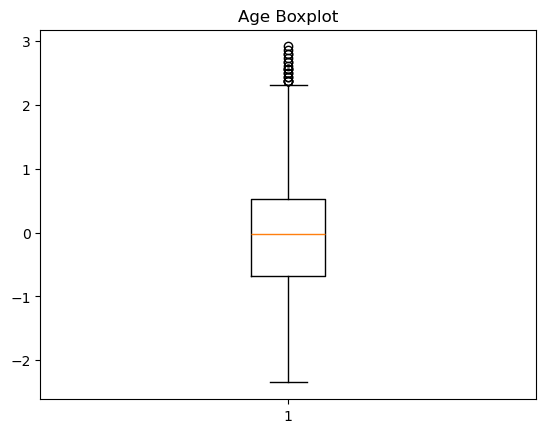

In [41]:
plt.boxplot(data.Age)
plt.title('Age Boxplot')
plt.show()

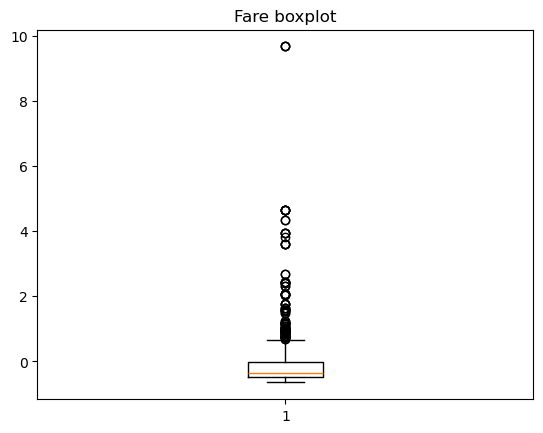

In [42]:
plt.boxplot(data.Fare)
plt.title('Fare boxplot')
plt.show()

In [44]:
Q1 = data[['Age', 'Fare']].quantile(0.25)
Q3 = data[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) | 
                              (data[['Age', 'Fare']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [45]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.673387,1,0,A/5 21171,-0.502445,Unknown,2
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.314113,0,0,STON/O2. 3101282,-0.488854,Unknown,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.524193,1,0,113803,0.420730,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,0.524193,0,0,373450,-0.486337,Unknown,2
5,6,0,3,"Moran, Mr. James",male,-0.014718,0,0,330877,-0.478116,Unknown,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,1.841532,0,0,17463,0.395814,E46,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,-1.990725,3,1,349909,-0.224083,Unknown,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,-0.254234,0,2,347742,-0.424256,Unknown,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,-1.272177,1,0,237736,-0.042956,Unknown,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,-1.870967,1,1,PP 9549,-0.312172,G6,2


In [47]:
import seaborn as sns

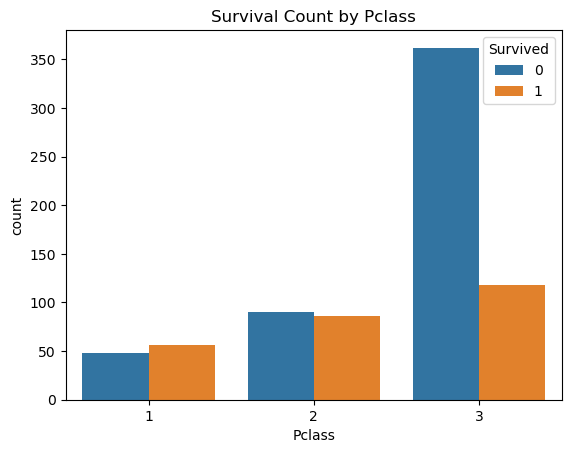

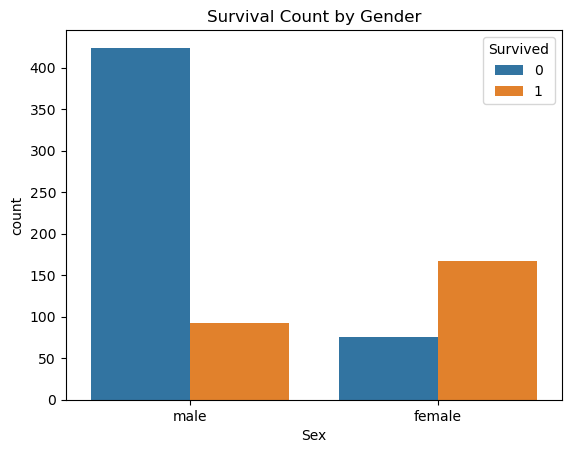

In [48]:
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Survival Count by Pclass')
plt.show()

sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()